# Hypothesis: 
A greater number of mass shootings will occur as a result of the shooter suffering from mental illness rather than being motivated by race?


# Questions to explore: 
1. Are there any relationships with attributes of the shooter - age, gender, mental health, race?
2. How frequent are mass shootings occurring in the US - weekly, monthly, annually? 
3. Where and when are mass shootings occurring most? 
4. Is there a correlation between location fatalities vs. injured? 
5. Weapon and shooting type?

# Additional findings: 
* 

In [1]:
import pandas as pd 
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline


In [2]:
mass_shootings = Path("mj_mass_shootings.csv")
shootings_df = pd.read_csv(mass_shootings)
pd.set_option('display.max_columns', None)

In [3]:
shootings_df = shootings_df.drop(['sources','mental_health_sources','sources_additional_age'],axis=1)
shootings_df.head(10)

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Sacramento County church shooting,"Sacramento, California",2/28/22,"""A man believed to be meeting his three childr...",4,0,4,Religious,-,-,-,-,-,-,-,-,M,38.601110,-121.418966,Mass,2022
1,Oxford High School shooting,"Oxford, Michigan",11/30/21,"Ethan Crumbley, a 15-year-old student at Oxfor...",4,7,11,School,15,-,-,-,-,semiautomatic handgun,Sig Sauer 9mm pistol,-,M,42.844108,-83.259928,Mass,2021
2,San Jose VTA shooting,"San Jose, California",5/26/21,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,yes,"Perpetrator had a history of depression, angry...",-,-,semiautomatic handguns,-,-,M,37.316097,-121.888533,Mass,2021
3,FedEx warehouse shooting,"Indianapolis, Indiana",4/15/21,"Brandon Scott Hole, 19, opened fire around 11 ...",8,7,15,Workplace,19,yes,Perpetrator had been reported to police in 202...,yes,-,semiautomatic rifle,-,White,M,39.686630,-86.323130,Mass,2021
4,Orange office complex shooting,"Orange, California",3/31/21,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,-,-,-,-,-,semiautomatic handgun,-,-,M,33.835420,-117.853790,Mass,2021
5,Boulder supermarket shooting,"Boulder, Colorado",3/22/21,"Ahmad Al Aliwi Alissa, 21, carried out a mass ...",10,0,10,Workplace,21,yes,Brother described him as paranoid; multiple ac...,Yes,-,"semiautomatic rifle, semiautomatic handgun; ta...",Ruger AR-556; weapon was purchased six days be...,-,M,39.986961,-105.251168,Mass,2021
6,Atlanta massage parlor shootings,"Atlanta, Georgia",3/16/21,"Robert Aaron Long, 21, killed eight people at ...",8,1,9,Workplace,21,-,-,-,-,-,-,White,M,34.111653,-84.580376,Spree,2021
7,Springfield convenience store shooting,"Springfield, Missouri",3/16/20,"Joaquin S. Roman, 31, went on a rampage culmin...",4,0,4,Workplace,31,-,-,-,-,-,-,-,M,37.210432,-93.236860,Mass,2020
8,Molson Coors shooting,"Milwaukee, Wisconsin",2/26/20,"Anthony Ferrill, 51, an employee armed with tw...",5,0,5,Workplace,51,-,-,-,-,semiautomatic handgun,-,Black,M,43.044511,-87.962537,Mass,2020
9,Jersey City kosher market shooting,"Jersey City, New Jersey",12/10/19,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,Other,-,-,-,-,-,-,-,Black,Male & Female,40.707363,-74.083609,Spree,2019


In [4]:
shootings_df.isnull().mean() * 100

case                                0.0
location                            0.0
date                                0.0
summary                             0.0
fatalities                          0.0
injured                             0.0
total_victims                       0.0
location.1                          0.0
age_of_shooter                      0.0
prior_signs_mental_health_issues    0.0
mental_health_details               0.0
weapons_obtained_legally            0.0
where_obtained                      0.0
weapon_type                         0.0
weapon_details                      0.0
race                                0.0
gender                              0.0
latitude                            0.0
longitude                           0.0
type                                0.0
year                                0.0
dtype: float64

In [5]:
shootings_df_cleaned = shootings_df.replace("-","NULL")
# shootings_df_cleaned.columns = shootings_df_cleaned.columns.str.replace('location.1','location',regex=True)                                                                 
shootings_df_cleaned.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Sacramento County church shooting,"Sacramento, California",2/28/22,"""A man believed to be meeting his three childr...",4,0,4,Religious,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,M,38.601110,-121.418966,Mass,2022
1,Oxford High School shooting,"Oxford, Michigan",11/30/21,"Ethan Crumbley, a 15-year-old student at Oxfor...",4,7,11,School,15,NULL,NULL,NULL,NULL,semiautomatic handgun,Sig Sauer 9mm pistol,NULL,M,42.844108,-83.259928,Mass,2021
2,San Jose VTA shooting,"San Jose, California",5/26/21,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,yes,"Perpetrator had a history of depression, angry...",NULL,NULL,semiautomatic handguns,NULL,NULL,M,37.316097,-121.888533,Mass,2021
3,FedEx warehouse shooting,"Indianapolis, Indiana",4/15/21,"Brandon Scott Hole, 19, opened fire around 11 ...",8,7,15,Workplace,19,yes,Perpetrator had been reported to police in 202...,yes,NULL,semiautomatic rifle,NULL,White,M,39.686630,-86.323130,Mass,2021
4,Orange office complex shooting,"Orange, California",3/31/21,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,NULL,NULL,NULL,NULL,NULL,semiautomatic handgun,NULL,NULL,M,33.835420,-117.853790,Mass,2021


In [6]:
shootings_df_cleaned['location'] = shootings_df_cleaned['location'].str.split(',').str[-1]
shootings_df_cleaned

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Sacramento County church shooting,California,2/28/22,"""A man believed to be meeting his three childr...",4,0,4,Religious,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,M,38.601110,-121.418966,Mass,2022
1,Oxford High School shooting,Michigan,11/30/21,"Ethan Crumbley, a 15-year-old student at Oxfor...",4,7,11,School,15,NULL,NULL,NULL,NULL,semiautomatic handgun,Sig Sauer 9mm pistol,NULL,M,42.844108,-83.259928,Mass,2021
2,San Jose VTA shooting,California,5/26/21,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,yes,"Perpetrator had a history of depression, angry...",NULL,NULL,semiautomatic handguns,NULL,NULL,M,37.316097,-121.888533,Mass,2021
3,FedEx warehouse shooting,Indiana,4/15/21,"Brandon Scott Hole, 19, opened fire around 11 ...",8,7,15,Workplace,19,yes,Perpetrator had been reported to police in 202...,yes,NULL,semiautomatic rifle,NULL,White,M,39.686630,-86.323130,Mass,2021
4,Orange office complex shooting,California,3/31/21,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,NULL,NULL,NULL,NULL,NULL,semiautomatic handgun,NULL,NULL,M,33.835420,-117.853790,Mass,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Shopping centers spree killings,Florida,4/23/1987,"Retired librarian William Cruse, 59, was paran...",6,14,20,Other,59,Yes,He suffered from paranoid delusions. A judge f...,Yes,"Gun store in Norwood, Ohio; The Oaks Trading P...","One rifle, one revolver, one shotgun","Sturm, Ruger Mini-14 semiautomatic rifle; 20-g...",white,Male,28.033189,-80.642970,Spree,1987
122,United States Postal Service shooting,Oklahoma,8/20/1986,"Postal worker Patrick Sherrill, 44, opened fir...",15,6,21,Workplace,44,Unclear,He was worried he had inherited mental problem...,Yes,"Issued by Oklahoma National Guard, where Sherr...",Three semiautomatic handguns,".22-caliber, two .45-caliber Colt Model 1911-A...",white,Male,35.667201,-97.429370,Mass,1986
123,San Ysidro McDonald's massacre,California,7/18/1984,"James Oliver Huberty, 41, opened fire in a McD...",22,19,41,Other,41,Yes,"The day before the shooting, he tried to make ...",Yes,Unknown,"One semiautomatic handgun, one rifle (assault)...",9mm Browning P35 Hi-Power semiautomatic handgu...,white,Male,32.552001,-117.043081,Mass,1984
124,Dallas nightclub shooting,Texas,6/29/1984,"Abdelkrim Belachheb, 39, opened fire at an ups...",6,1,7,Other,39,Yes,"During his last meal with his wife, he confess...",No,"Hines Boulevard Pawn Shop in Dallas, Texas",One semiautomatic handgun,9mm Smith & Wesson 459 semiautomatic handgun,white,Male,32.925166,-96.838676,Mass,1984


<AxesSubplot:xlabel='year'>

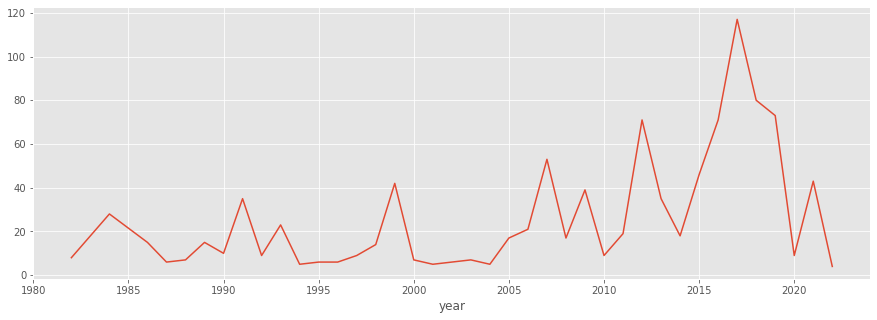

In [9]:
fatality_per_year = shootings_df_cleaned.groupby('year')['fatalities'].sum()
fatality_per_year.plot(kind='line',x='year',y='fatalities',figsize=(15,5))    

## Correlation
**Note:** Correlation is only valid for numeric variables

In [11]:
shootings_df_cleaned_corr = shootings_df_cleaned.corr()
shootings_df_cleaned_corr

,fatalities,injured,total_victims,latitude,longitude,year
fatalities,1.000000,0.661317,0.737266,-0.204248,0.022313,-0.017277
injured,0.661317,1.000000,0.994340,-0.052412,-0.105125,0.050385
total_victims,0.737266,0.994340,1.000000,-0.076135,-0.091523,0.042934
latitude,-0.204248,-0.052412,-0.076135,1.000000,-0.063901,0.103112
longitude,0.022313,-0.105125,-0.091523,-0.063901,1.000000,0.004830
year,-0.017277,0.050385,0.042934,0.103112,0.004830,1.000000


## Correlation
The below heatmaps indicate a positive correlation between fatalities and injured.

<AxesSubplot:>

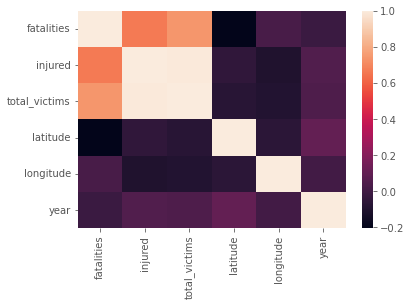

In [12]:
# Create a heatmap from the correlation values
sns.heatmap(shootings_df_cleaned_corr)

<AxesSubplot:>

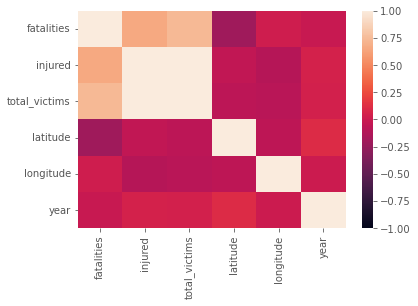

In [13]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(shootings_df_cleaned_corr, vmin=-1, vmax=1)

<AxesSubplot:ylabel='location.1'>

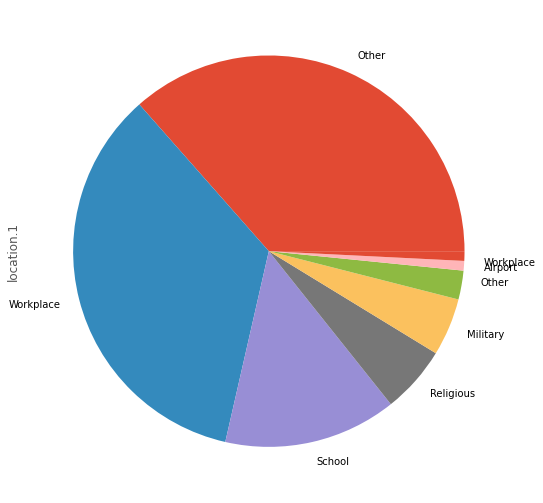

In [18]:
# Count the frequency of shootings per state 
state_cleaned = shootings_df['location.1'].value_counts()
state_cleaned.plot(kind='pie',figsize=(9,9))

## Diving deeper into shootings in 2017
2017 had the highest number of fatalities and injured. 

In [10]:
data_2017 = shootings_df_cleaned['year'] == 2017
shootings_df_2017 = shootings_df_cleaned[data_2017]
shootings_df_2017.head()
# age_distribution.plot(kind='line',x=figsize=(10,5),color='red')

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
31,Rancho Tehama shooting spree,California,11/14/17,"Kevin Janson Neal, 44, went on an approximatel...",5,10,15,Other,44,TBD,NULL,No,TBD,semiautomatic rifles,Two illegally modified rifles,White,M,40.018759,-122.393089,Spree,2017
32,Texas First Baptist Church massacre,Texas,11/5/17,"Devin Patrick Kelley, a 26-year-old ex-US Air ...",26,20,46,Religious,26,Yes,"Kelley had a history of domestic violence, inc...",Kelley passed federal criminal background chec...,Purchased in April 2016 from an Academy Sports...,semiautomatic rifle,Ruger AR-556; Kelley also possessed semiautoma...,White,M,29.273282,-98.056488,Mass,2017
33,Walmart shooting in suburban Denver,Colorado,11/1/17,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,0,3,Other,47,Unclear,NULL,TBD,NULL,semiautomatic handgun,NULL,White,M,39.876374,-104.986132,Mass,2017
34,Edgewood businees park shooting,Maryland,10/18/17,"Radee Labeeb Prince, 37, fatally shot three pe...",3,3,6,Workplace,37,Unclear,NULL,No,Unclear,handgun,.380-caliber; make unclear,Black,M,39.452189,-76.309988,Mass,2017
35,Las Vegas Strip massacre,Nevada,10/1/17,"Stephen Craig Paddock, 64, fired a barrage of ...",58,546,604,Other,64,TBD,Perpetrator's history unclear. In 1969 Paddock...,Yes,Two gun shops in Nevada,"23 firearms, mostly rifles; including scopes, ...","AR-15-style and AK-47-style rifles and ""a larg...",White,M,36.095739,-115.171544,Mass,2017


In [ ]:
locations_2017 = shootings_df_2017['location.1'].value_counts()
locations_2017

In [ ]:
locations_2017.plot(kind='bar')

In [ ]:
gender = shootings_df_2017['gender'].value_counts()
gender.plot(kind='pie')

In [ ]:
had_illness = shootings_df_2017['prior_signs_mental_health_issues'].value_counts()
had_illness

In [ ]:
shootings_df_2017['location'] = shootings_df_2017['location'].str.split(',').str[-1]
shootings_df_2017

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=shootings_df_2017['longitude'], y=shootings_df_2017['latitude'])
plt.show()

In [ ]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
geometry = [Point(xy) for xy in zip(shootings_df_2017['longitude'],shootings_df_2017['latitude'])]
geometry[:3]

In [ ]:
crs = {'init':'epsg:4326'}

In [ ]:
geo_df = gpd.GeoDataFrame(shootings_df_2017,crs=crs,geometry=geometry)
geo_df.head()
geo_df = geo_df.replace("NaN",0)
geo_df

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America
ax = world[world.continent == 'South America'].plot(figsize=(30,8))


In [ ]:
fig,ax = plt.subplots(figsize = (15,15))
world.plot(ax=ax, alpha=0.4,color="grey")
# geo_df[geo_df['location'] == 'California'].plot(ax=ax, markersize = 20, color = "blue",marker = "o",label='California')
geo_df[geo_df['location'] == 'Texas'].plot(ax=ax, markersize = 20, color = "red",marker = "^",label='Texas')
# geo_df[geo_df['location'] == 'Colorado'].plot(ax=ax, markersize = 20, color = "blue",marker = "o",label='Colorado')
# geo_df[geo_df['location'] == 'Maryland'].plot(ax=ax, markersize = 20, color = "blue",marker = "^",label='Maryland')
geo_df[geo_df['location'] == 'Nevada'].plot(ax=ax, markersize = 20, color = "blue",marker = "o",label='Nevada')
plt.legend(prop={'size':15})